In [3]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---

- ## 모집단의 비율로부터 표본집단에서의 비율 구하기
    - ### sample_proportions(sample_size, model_proportions)
        - #### sample_size: 표본 크기
        - #### model_proportions: 모집단에서의 비율

- #### 표본 300개에서 (0.25, 0.5, 0.25)의 확률

In [4]:
sample_proportions(300, [0.25, 0.5, 0.25])

array([ 0.24666667,  0.50333333,  0.25      ])

---

- ## 배심원 선정 시 발생한 인종적 편견
    - #### 21세 이상 남성이 배심원 자격을 가짐
    - #### 21세 이상 남성 중 26%가 흑인
    - #### 선정된 배심원은 100명 중 8%만 흑인이었음

<br>

- ### 인구 중 26%가 흑인인 모집단에서 배심원을 선정하는 시뮬레이션
    - #### 100명 당 흑인의 수로 10000번 시뮬레이션
        - #### 대략 15명 ~ 40명

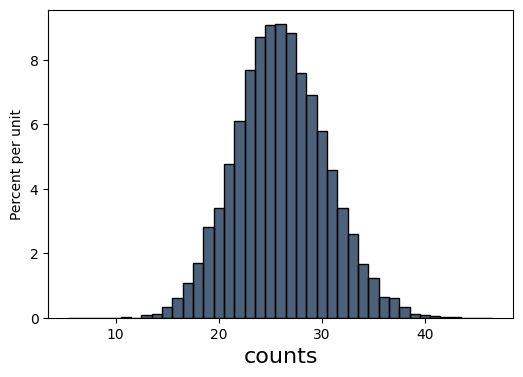

In [9]:
def one_simulated_count():
    return sample_proportions(100, [0.26, 0.74]) * 100

counts = make_array()
for _ in range(10000):
    counts = np.append(counts, one_simulated_count())
Table().with_columns("counts", counts).hist("counts", bins=np.arange(5.5, 46.6, 1))

- #### 위 히스토그램에서 8명의 위치를 표시
    - <h4 style="color: red">8명만큼 낮은 패널리스트 수를 얻을 가능성이 거의 없음</h4>

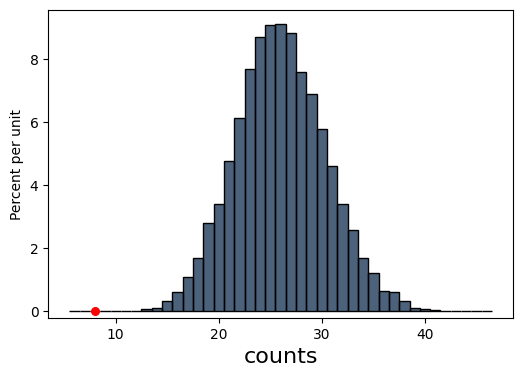

In [13]:
Table().with_columns("counts", counts).hist("counts", bins=np.arange(5.5, 46.6, 1))

plt.ylim(-0.002)
plt.scatter(8, 0, color="red", s=30)

---

- ## Alameda County의 배심원 패널리스트 특정 인종, 민족 그룹 과소 대표

<br>

In [46]:
jury = Table().with_columns(
    "Ethnicity", make_array("Asian/PI", "Black/AA", "Caucasian", "Hispanic", "Other"),
    "Eligible", make_array(0.15, 0.18, 0.54, 0.12, 0.01),
    "Panels", make_array(0.26, 0.08, 0.54, 0.08, 0.04))
jury

Ethnicity,Eligible,Panels
Asian/PI,0.15,0.26
Black/AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


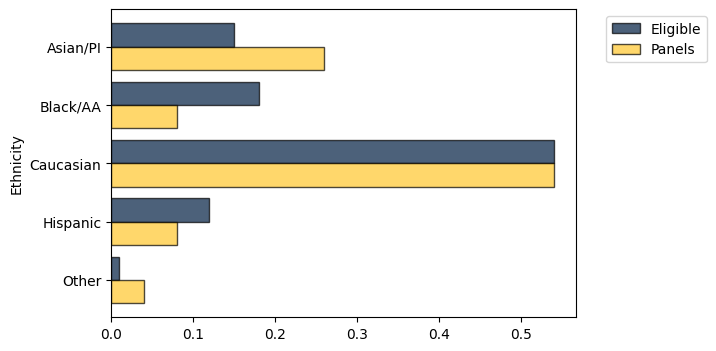

In [24]:
jury.barh("Ethnicity")

<br>

- ### 1453개의 무작위 표본에 대한 패널 비율 추가
    - <h4 style="color: red">적격 배심원 후보자 비율과 유사하게 나타남</h4>

In [21]:
jury_with_sample = jury.with_column("Random Sample", sample_proportions(1453, jury.column("Eligible")))
jury_with_sample

Ethnicity,Eligible,Panels,Random Sample
Asian/PI,0.15,0.26,0.165175
Black/AA,0.18,0.08,0.17894
Caucasian,0.54,0.54,0.527185
Hispanic,0.12,0.08,0.121817
Other,0.01,0.04,0.00688231


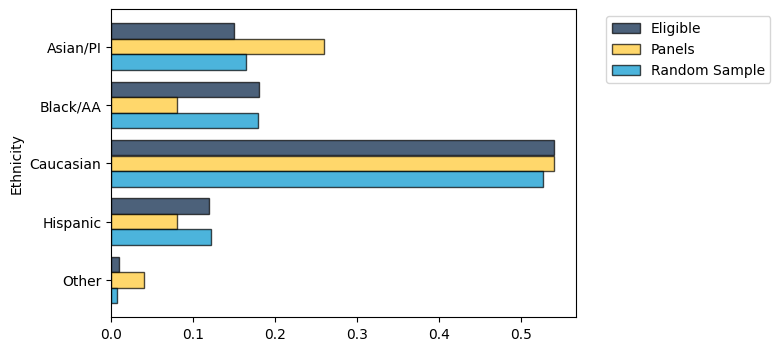

In [22]:
jury_with_sample.barh("Ethnicity")

<br>

---

- ### 선정된 패널과 무작위 표본의 TVD 비교
    - #### TVD (거리 차의 합)
        - #### 차이의 절댓값의 합 // 2
        - #### 차이가 양수인 값들의 합

<br>

- #### 선정된 패널의 TVD

In [28]:
jury_with_diff = jury.with_column("Absolute Difference", np.abs(jury.column("Panels") - jury.column("Eligible")))
jury_with_diff

Ethnicity,Eligible,Panels,Absolute Difference
Asian/PI,0.15,0.26,0.11
Black/AA,0.18,0.08,0.1
Caucasian,0.54,0.54,0
Hispanic,0.12,0.08,0.04
Other,0.01,0.04,0.03


In [29]:
np.sum(jury_with_diff.column("Absolute Difference")) / 2

0.14000000000000001

<br>

- #### 1453개의 무작위 샘플에 대한 TVD를 5000번 시뮬레이션
    - <h4 style="color: red;">0.14의 TVD를 가지는 패널리스트의 분포는 적절하지 않음</h4>

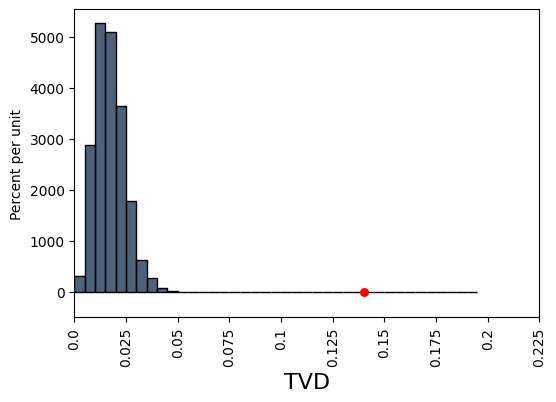

In [53]:
def one_simulated_tvd():
    return np.sum(np.abs(sample_proportions(1453, jury.column("Eligible")) - jury.column("Eligible"))) / 2

tvds = make_array()
for _ in range(5000):
    tvds = np.append(tvds, one_simulated_tvd())

Table().with_column("TVD", tvds).hist(bins=np.arange(0, 0.2, 0.005))
plt.xlim(0)
plt.ylim(-5)
plt.scatter(0.14, 0, color="red", s=30)